In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv(r'C:\work\Data_analyst\Test\Космос\TZ_GP.csv')

In [13]:
# Зададим настройки графиков
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [2]:
df

,user_id,media_source,client_time,session_index,game_status,event_name,event_data
0,60c588d7b4d1b24b40531f29,organic,2021-06-05 07:23:06,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""Xiaomi POCO M2 Pro"",""graphicMemory""..."
1,60d34c7ab4d1b24b405324ac,organic,2021-06-05 16:33:26,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-J200G"",""graphicMemory"":2..."
2,60babef87c80da6a9442cb86,ad-traffic,2021-06-05 00:02:07,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-G781B"",""graphicMemory"":2..."
3,60bac0e912667e6a8d107731,ad-traffic,2021-06-05 00:04:29,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-T290"",""graphicMemory"":51..."
4,60babfb17c80da6a9442cb87,organic,2021-06-05 00:05:16,1,"{""coins"":0,""freeRounds"":0,""freeUndo"":0,""freeWi...",appInstall,"{""device"":""samsung SM-N960F"",""graphicMemory"":2..."
...,...,...,...,...,...,...,...
396094,60bb2f3912667e6a8d107757,organic,2021-06-12 11:52:41,54,"{""coins"":1174190,""freeRounds"":30,""freeUndo"":30...",transactionComplete,"{""inLevel"":false,""usdProceed"":68.1768094378241..."
396095,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:06,57,"{""coins"":7885,""freeRounds"":0,""freeUndo"":394,""f...",transactionComplete,"{""inLevel"":false,""usdProceed"":6.81001009386441..."
396096,60bb2f3912667e6a8d107757,organic,2021-06-12 15:18:30,57,"{""coins"":107885,""freeRounds"":0,""freeUndo"":394,...",transactionComplete,"{""inLevel"":false,""usdProceed"":13.6285433543043..."
396097,60bc090c12667e6a8d1077b8,organic,2021-06-12 22:48:26,2,"{""coins"":45274,""freeRounds"":0,""freeUndo"":3,""fr...",transactionComplete,"{""inLevel"":false,""usdProceed"":1.393,""productDe..."


In [18]:
# Установим client_time в индекс, чтобы сделать resample
df['client_time'] = pd.to_datetime(df.client_time)
df = df.set_index('client_time')

In [19]:
# Посчитаем все события по дням: 2021-06-05 скачок 
df.resample(rule='D')\
    .count()

,user_id,media_source,session_index,game_status,event_name,event_data
client_time,,,,,,
2021-06-05,176640,176640,176640,176640,176640,176640
2021-06-06,61197,61197,61197,61197,61197,61197
2021-06-07,31167,31167,31167,31167,31167,31167
2021-06-08,27900,27900,27900,27900,27900,27900
2021-06-09,27853,27853,27853,27853,27853,27853
2021-06-10,22591,22591,22591,22591,22591,22591
2021-06-11,23552,23552,23552,23552,23552,23552
2021-06-12,25199,25199,25199,25199,25199,25199


In [20]:
# Посчитаем количество уникальных пользователей по дням (DAU)
DAU = df.resample(rule='D')\
    .user_id.nunique()
DAU

client_time
2021-06-05    452
2021-06-06    241
2021-06-07    200
2021-06-08    165
2021-06-09    160
2021-06-10    147
2021-06-11    130
2021-06-12    117
Freq: D, Name: user_id, dtype: int64

C:\Users\emma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'DAU')

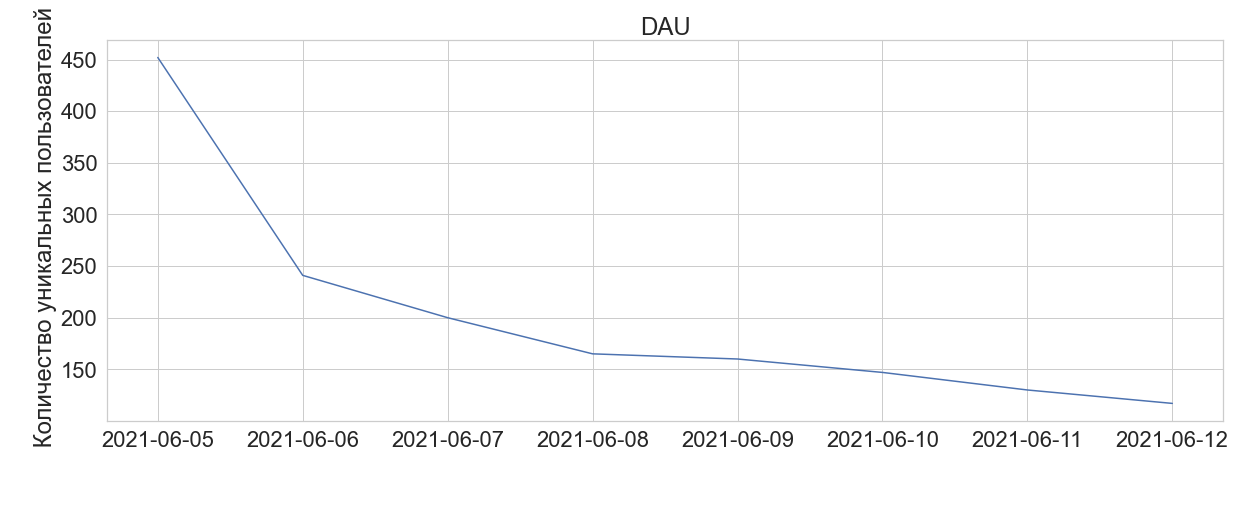

In [21]:
# График DAU за период

ax = sns.lineplot(DAU.index, DAU)
ax.set_ylabel('\n Количество уникальных пользователей')
ax.set_xlabel('\n  ')
ax.set_title('DAU')

In [22]:
# все установки произошли 2021-06-05 - была запущена рекламная кампания?
df.query('event_name =="appInstall"') \
    .resample(rule='D')\
    .agg({'user_id':'count'})

,user_id
client_time,
2021-06-05,452


In [23]:
# в какие дни  игроки больше покупают? 
# 2021-06-12 потратили в разы больше денег, чем в другие дни периода (365 $)
buy = df.query('event_name == "transactionComplete"') \
    .event_data.str.extract(r'"usdProceed":(.*),')
buy.columns = ['money']
buy = buy.astype({'money':'float'})
money_install = buy.resample(rule='D')\
    .agg({'money':'sum'}) \
    .reset_index() \
    .round()
money_install

,client_time,money
0,2021-06-05,5.0
1,2021-06-06,17.0
2,2021-06-07,21.0
3,2021-06-08,12.0
4,2021-06-09,6.0
5,2021-06-10,5.0
6,2021-06-11,7.0
7,2021-06-12,365.0


[Text(0, 0, '2021-06-05'),
 Text(1, 0, '2021-06-06'),
 Text(2, 0, '2021-06-07'),
 Text(3, 0, '2021-06-08'),
 Text(4, 0, '2021-06-09'),
 Text(5, 0, '2021-06-10'),
 Text(6, 0, '2021-06-11'),
 Text(7, 0, '2021-06-12')]

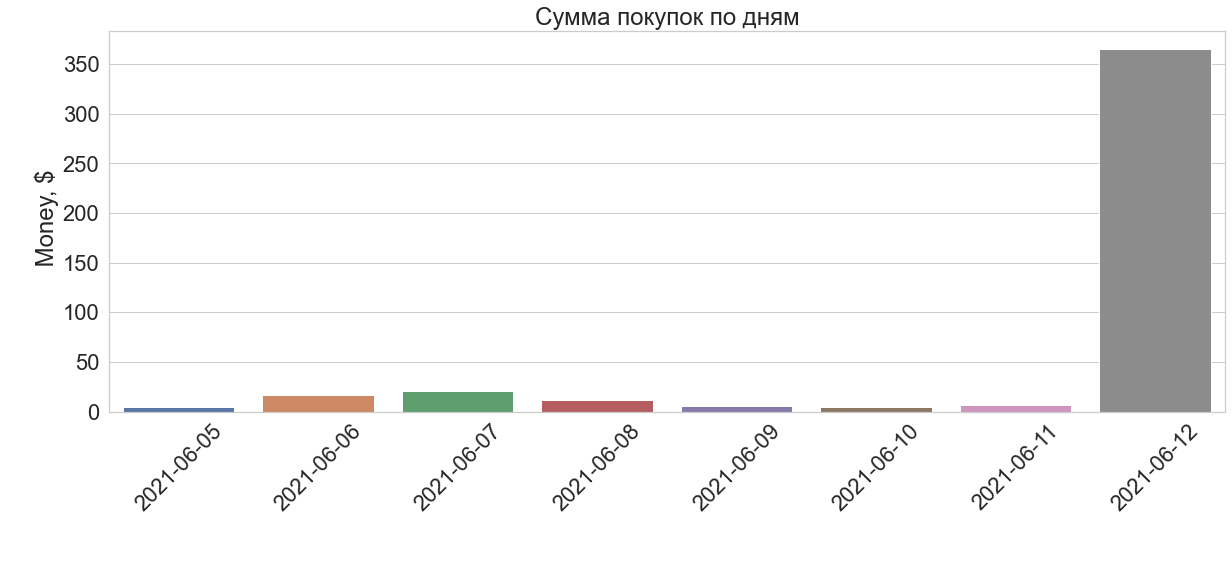

In [24]:
ax = sns.barplot(x="client_time", y="money", data=money_install)
ax.set_ylabel('\n Money, $')
ax.set_xlabel('\n  ')
ax.set_title('Сумма покупок по дням')
ax.set_xticklabels(labels=money_install.client_time.dt.date, rotation=45)

In [25]:
# количество покупок по дням
# Больше всего покупок на 7 день после установки 

count_buy = buy.resample(rule='D')\
    .agg({'money':'count'}) \
    .reset_index()
count_buy

,client_time,money
0,2021-06-05,1
1,2021-06-06,7
2,2021-06-07,4
3,2021-06-08,6
4,2021-06-09,2
5,2021-06-10,2
6,2021-06-11,2
7,2021-06-12,12


C:\Users\emma\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Количество покупок по дням')

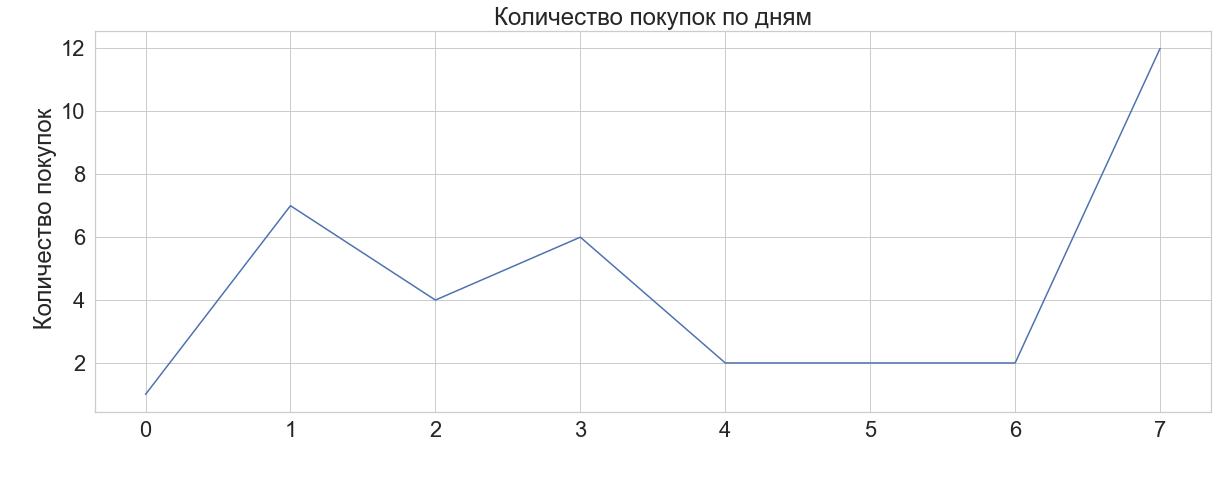

In [26]:
ax = sns.lineplot(count_buy.index, count_buy.money)
ax.set_ylabel('\n Количество покупок')
ax.set_xlabel('\n  ')
ax.set_title('Количество покупок по дням')

In [27]:
# Посчитаем процентное соотношение пользователей, купивших что-то, к общему числу пользователей 2.65 %
(df.query('event_name == "transactionComplete"').user_id.nunique()/df.user_id.nunique())*100

2.6548672566371683

In [29]:
# Посмотрим распределение игроков по уровням (до 30-го) для события старта игры (сколько игроков начали игру)

level_Start = df.query('event_name =="levelStart"').event_data.str.extract(r'"level":(\d*)')
level_Start.columns = ['level']
level_Start = level_Start.astype({'level':'int32'})
lvl_Start = level_Start.query('level < 31').value_counts().to_frame().reset_index().sort_values('level')

In [30]:
# Посмотрим распределение игроков по уровням (до 30-го) для события конца игры (сколько игроков закончили игру)

level_End = df.query('event_name =="levelEnd"').event_data.str.extract(r'"level":(\d*)')
level_End.columns = ['level']
level_End = level_End.astype({'level':'int32'})
lvl_End = level_End.query('level < 31').value_counts().to_frame().reset_index().sort_values('level')

In [31]:
# Узнаем разницу между количеством людей, которые начали игру и количеством людей, которые игру завершили
# Больше всего не завершили игру на 0, 1, 2, 9, 17 уровнях

lvl_Start.columns = ['level', 'number_Start']
lvl_End.columns = ['level', 'number_End']
lvl_End['diff_Start-End'] = lvl_End['number_End'] - lvl_Start['number_Start']
lvl_End = lvl_End.merge(lvl_Start, how = 'inner', on = 'level')

In [32]:
lvl_End

,level,number_End,diff_Start-End,number_Start
0,1,438,-49,487
1,2,421,-19,440
2,3,408,-7,415
3,4,407,-3,412
4,5,393,-2,404
5,6,394,-3,397
6,7,404,-2,406
7,8,407,-5,408
8,9,406,-2,410
9,10,397,-7,395


Text(0.5, 1.0, 'Разница между начавшими и закончившими игру игроками ')

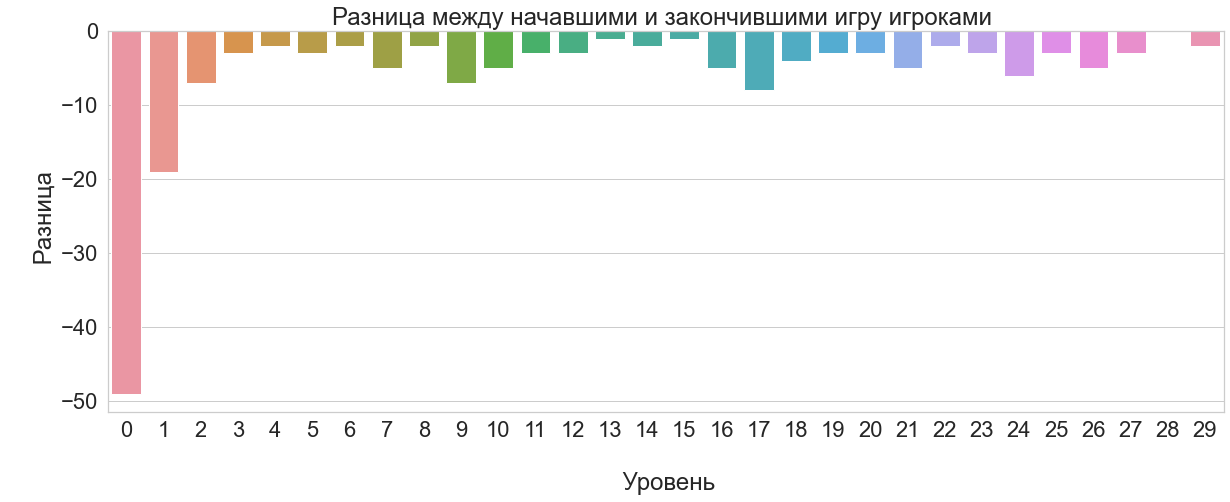

In [33]:
ax1 = sns.barplot(x="level", y="diff_Start-End", data=lvl_End)
ax1.set_ylabel('\n Разница')
ax1.set_xlabel('\n Уровень')
x_labels = [int(i) for i in ax1.get_xticks()] 
ax1.set_xticklabels(x_labels)
ax1.set_title('Разница между начавшими и закончившими игру игроками ')

In [34]:
# Посмотрим разницу между количеством людей, завершившим текущий уровень, 
# и количеством людей, завершившим предыдущий уровень. 
# Положительные значения - прибавилось количество игроков по сравнению с предыдущим уровнем.
lvl_End['shift_level_End'] = lvl_End['number_End'] - lvl_End['number_End'].shift(1)
lvl_End = lvl_End.fillna(0)
lvl_End

,level,number_End,diff_Start-End,number_Start,shift_level_End
0,1,438,-49,487,0.0
1,2,421,-19,440,-17.0
2,3,408,-7,415,-13.0
3,4,407,-3,412,-1.0
4,5,393,-2,404,-14.0
5,6,394,-3,397,1.0
6,7,404,-2,406,10.0
7,8,407,-5,408,3.0
8,9,406,-2,410,-1.0
9,10,397,-7,395,-9.0


Text(0.5, 1.0, 'Разница между завершившими текущий уровень и предыдущий')

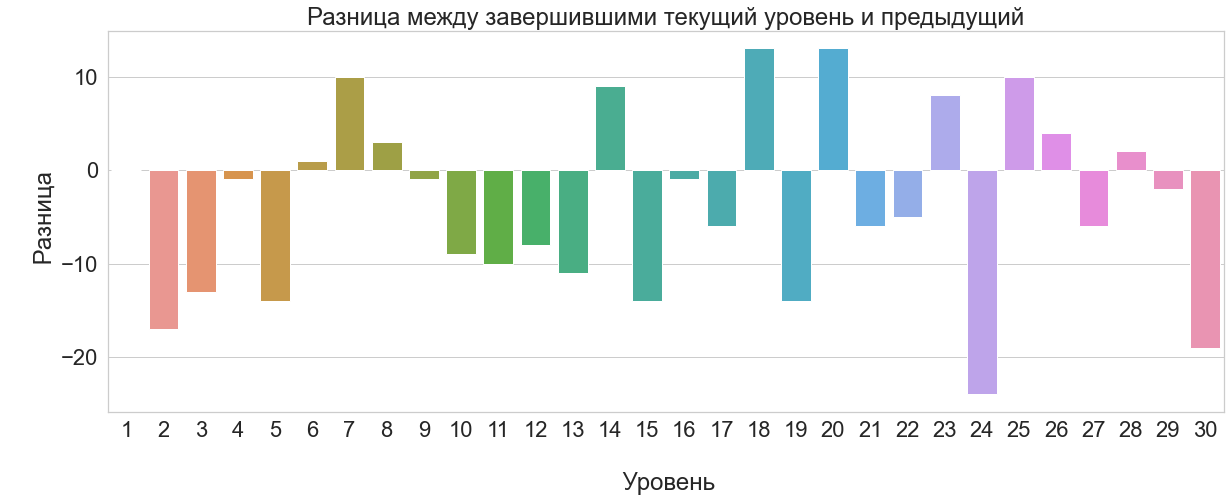

In [35]:
# Больше всего (по сравнению с предыдущим) отвалилось игроков на 24 уровне 

ax2 = sns.barplot(x='level', y='shift_level_End', data=lvl_End)
ax2.set_ylabel('\n Разница')
ax2.set_xlabel('\n Уровень')
ax2.set_title('Разница между завершившими текущий уровень и предыдущий')